In [1]:
import pandas as pd

In [3]:
%time data = pd.read_csv("./restaurant.csv", delimiter=",", index_col=0)

CPU times: user 24.8 ms, sys: 9.23 ms, total: 34.1 ms
Wall time: 46.9 ms


In [4]:
data.sample(5)

,Order Name,Order Date,Quantity,Rating,Price,Total Price
Order ID,,,,,,
2666,Avocado Juice,05/01/2019 18:41,7,"2,22",20792,145544
4409,Chicken Eggstra,15/02/2018 19:19,9,"3,49",12655,113895
3590,Banana Split Frappuccino,18/08/2018 19:57,2,"3,68",33753,67506
9885,Caramel Macchiato,02/07/2017 19:08,1,"3,15",32865,32865
10170,Caramel Macchiato,25/03/2017 18:16,4,"3,78",27980,111920


In [5]:
data.describe()

,Quantity,Price,Total Price
count,11001.000000,11001.000000,11001.000000
mean,5.532770,22280.487410,123413.204345
std,2.870864,7165.508202,78080.044909
min,1.000000,10002.000000,10013.000000
25%,3.000000,16007.000000,60594.000000
50%,6.000000,22327.000000,110383.000000
75%,8.000000,28357.000000,173727.000000
max,10.000000,35000.000000,349830.000000


In [6]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [7]:
total

Total Price    0
Price          0
Rating         0
Quantity       0
Order Date     0
Order Name     0
dtype: int64

In [8]:
missing_data

,Total,Missing Percent
Total Price,0,0.0
Price,0,0.0
Rating,0,0.0
Quantity,0,0.0
Order Date,0,0.0
Order Name,0,0.0


In [9]:
missing_data.loc[missing_data['Missing Percent'] > 10] [:10]

,Total,Missing Percent


In [10]:
import pandas_profiling

In [12]:
data_resto = pd.read_csv('./restaurant.csv')
profile = data_resto.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="resto_pandas_profiling.html")

AttributeError: ignored

### Seaborn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [14]:
import seaborn as sns

In [15]:
restaurant = pd.read_csv('./restaurant.csv')

In [16]:
restaurant.shape

(11001, 7)

In [17]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order ID     11001 non-null  int64 
 1   Order Name   11001 non-null  object
 2   Order Date   11001 non-null  object
 3   Quantity     11001 non-null  int64 
 4   Rating       11001 non-null  object
 5   Price        11001 non-null  int64 
 6   Total Price  11001 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 601.7+ KB


### Menganalisis Variabel Secara Individual

In [18]:
numerical_vars = ['Order Date','Quantity','Rating','Price','Total Price']
categorical_vars = ['Order Name']

In [19]:
restaurant = restaurant[numerical_vars+categorical_vars]

In [20]:
restaurant.shape

(11001, 6)

### Memahami Variabel Utama

In [21]:
restaurant['Order Name'].describe()

count                 11001
unique                  114
top       Caramel Macchiato
freq                   3598
Name: Order Name, dtype: object

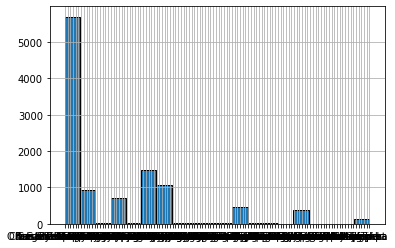

In [22]:
restaurant['Order Name'].hist(edgecolor='black',bins=20);

### Variabel Numerikal

In [23]:
restaurant[numerical_vars].describe()

,Quantity,Price,Total Price
count,11001.000000,11001.000000,11001.000000
mean,5.532770,22280.487410,123413.204345
std,2.870864,7165.508202,78080.044909
min,1.000000,10002.000000,10013.000000
25%,3.000000,16007.000000,60594.000000
50%,6.000000,22327.000000,110383.000000
75%,8.000000,28357.000000,173727.000000
max,10.000000,35000.000000,349830.000000


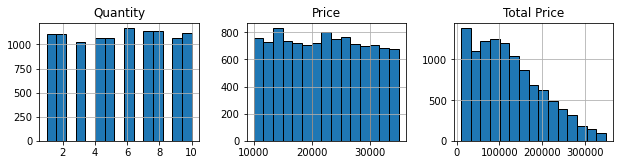

In [24]:
restaurant[numerical_vars].hist(edgecolor='black',bins=15, figsize=(14,5), layout=(2,4));

### Variabel Kategorikal

<AxesSubplot:title={'center':'Order Name'}>

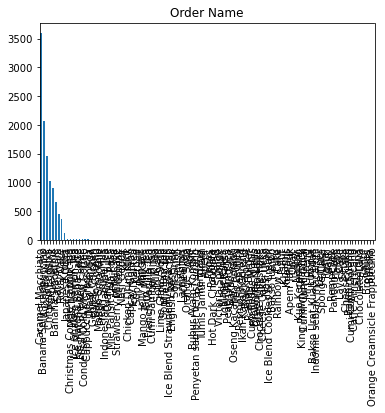

In [ ]:
restaurant['Order Name'].value_counts().plot(kind='bar', title='Order Name')

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_ma

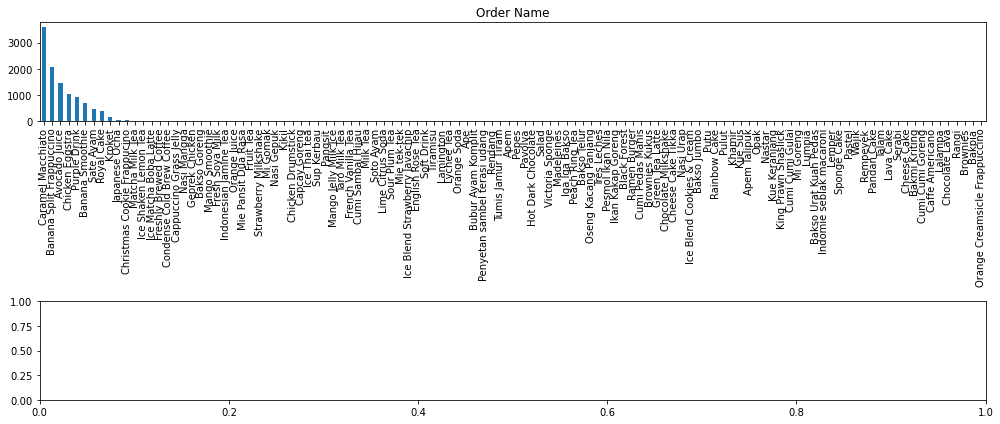

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [ ]:
def identify_cat_above50(series):
    counts = series.value_counts()
    return list(counts[counts>=50].index)

In [ ]:
levels_to_keep = restaurant[categorical_vars].apply(identify_cat_above50, axis=0)
levels_to_keep

Order Name    [Caramel Macchiato, Banana Split Frappuccino, ...
dtype: object

In [ ]:
for var in categorical_vars:
    restaurant = restaurant.loc[restaurant[var].isin(levels_to_keep[var])]

In [ ]:
restaurant.shape

(10682, 6)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_ma

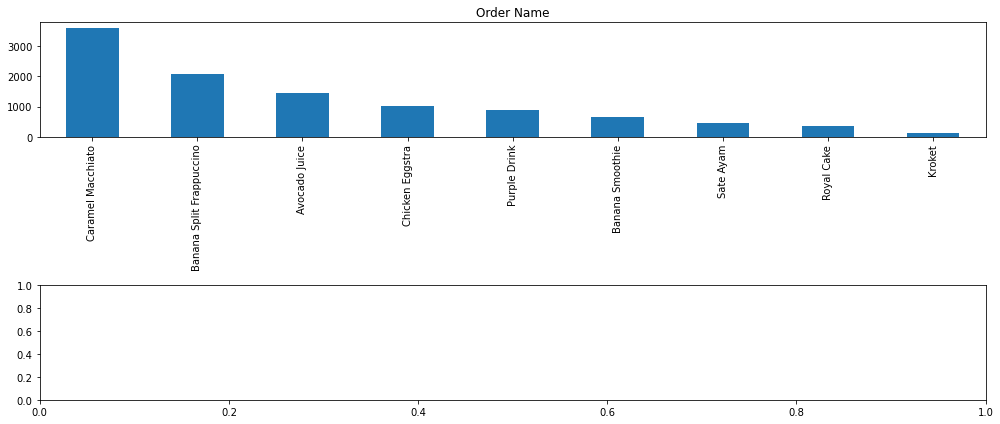

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    restaurant[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

## Hubungan antar Variabel dengan Scatter Plot

<AxesSubplot:xlabel='Total Price', ylabel='Quantity'>

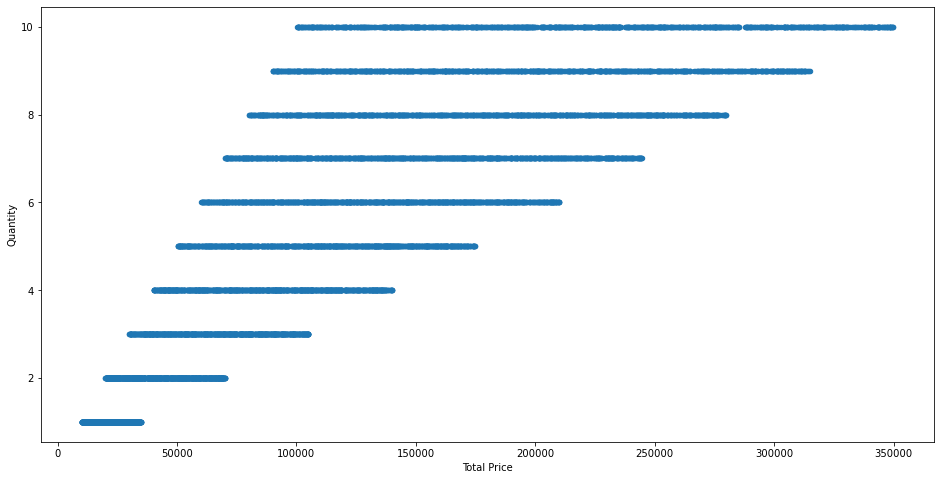

In [ ]:
restaurant.plot.scatter(figsize=(16,8), x='Total Price', y='Quantity')

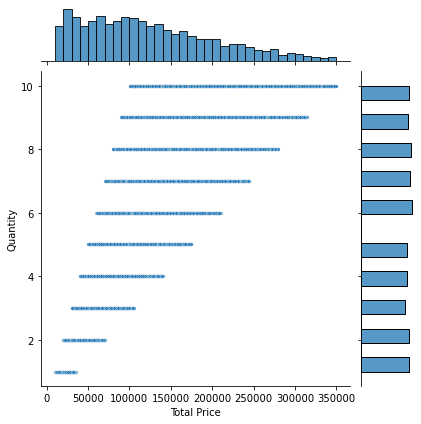

In [ ]:
sns.jointplot(x='Total Price', y='Quantity', data=restaurant, joint_kws={"s": 10});

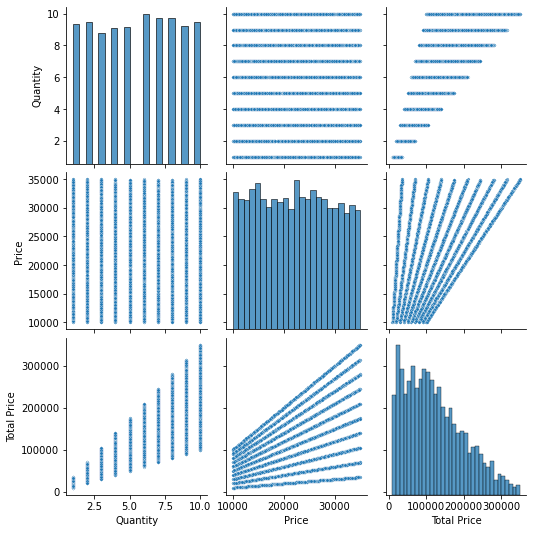

In [ ]:
sns.pairplot(restaurant[numerical_vars[:5]],plot_kws={"s":10});

In [ ]:
restaurant[numerical_vars].corr()

,Quantity,Price,Total Price
Quantity,1.000000,0.004738,0.820067
Price,0.004738,1.000000,0.511250
Total Price,0.820067,0.511250,1.000000


In [ ]:
restaurant[numerical_vars].corr()['Total Price'].sort_values(ascending=False)

Total Price    1.000000
Quantity       0.820067
Price          0.511250
Name: Total Price, dtype: float64

In [ ]:
correlations = restaurant[numerical_vars].corr()

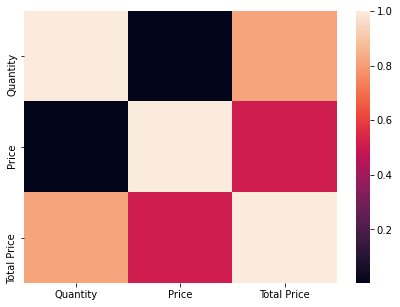

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax=ax);

## Hubungan Antara Variabel dengan Bloxpot

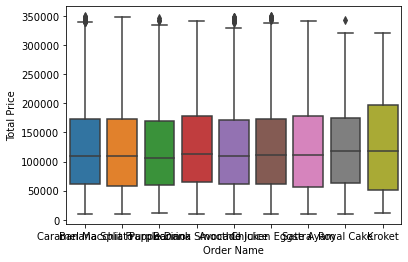

In [ ]:
sns.boxplot(x='Order Name', y='Total Price', data=restaurant);

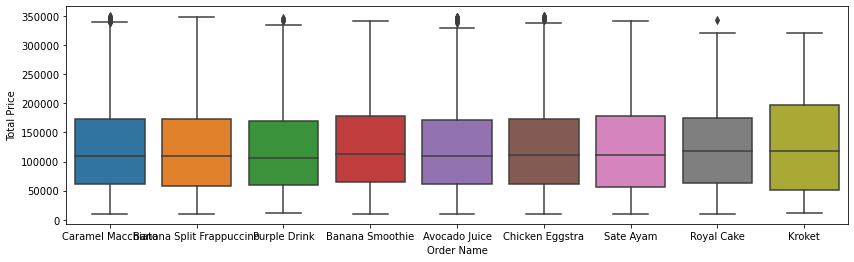

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Order Name', y='Total Price', data=restaurant, ax=ax);

In [ ]:
sorted_nb = restaurant.groupby('Order Name')['Total Price'].median().sort_values().index.values

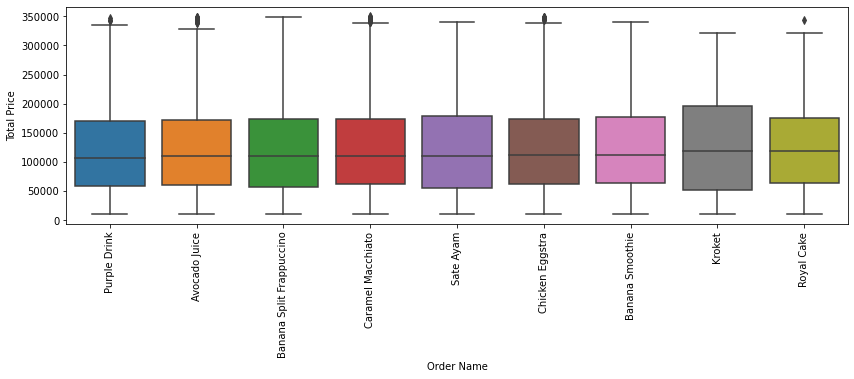

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Order Name', y='Total Price', data=restaurant, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

In [ ]:
import os 
import sys
import pandas as pd



In [ ]:
data_folder= os.path.expanduser("./restaurant.csv")
ratings_filename = os.path.join(data_folder, "u.data")

In [ ]:
all_ratings = pd.read_csv(ratings_filename, delimiter="\t",
                         header=None, names = ["Order ID", "Order Name", "Rating", "Order Date"])

FileNotFoundError: [Errno 2] File b'./restaurant.csv\\u.data' does not exist: b'./restaurant.csv\\u.data'

# IMPLEMENTATION

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 6)

In [58]:
min_support = 0.1

In [59]:
metric = "lift"  # confident rule = 50%
min_threshold_for_metric = 1

In [70]:
asosiasi = (
    data.groupby([
        'Order ID', 'Order Name'
    ])['Quantity'].sum()  
    .unstack().reset_index()  # Transformasi
    .fillna(0)  # nilai null diisi 0
    .set_index('Order ID')  # men-set Order ID sebagai index
)

In [71]:
print("One order per row with the quantity of each product")
asosiasi.head()

One order per row with the quantity of each product


Order Name,Ape,Apem,Apem Talipuk,Avocado Juice,Bakmi Kriting,...,Tiramisu,Tres Leches,Tumis Jamur Tiram,Victoria Sponge,Wajik
Order ID,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [73]:
asosiasi_boolean_set = asosiasi.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0)

print("Converted quantity to boolean values")
asosiasi_boolean_set.head()

Converted quantity to boolean values


Order Name,Ape,Apem,Apem Talipuk,Avocado Juice,Bakmi Kriting,...,Tiramisu,Tres Leches,Tumis Jamur Tiram,Victoria Sponge,Wajik
Order ID,,,,,,,,,,,
1000,0,0,0,0,0,...,0,0,0,0,0
1001,0,0,0,0,0,...,0,0,0,0,0
1002,0,0,0,0,0,...,0,0,0,0,0
1003,0,0,0,0,0,...,0,0,0,0,0
1004,0,0,0,0,0,...,0,0,0,0,0


In [75]:
frequent_itemsets = apriori(asosiasi_boolean_set, min_support=min_support, use_colnames=True)

print("\nFrequent itemsets menggunakan apriori dan minimun support sebesar  %.2f persen" % (min_support*100))
frequent_itemsets.head(10)


Frequent itemsets menggunakan apriori dan minimun support sebesar  10.00 persen


,support,itemsets
0,0.132988,(Avocado Juice)
1,0.188165,(Banana Split Frappuccino)
2,0.327061,(Caramel Macchiato)


In [76]:
aturan = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold_for_metric)